# Case Lighthouse - Daianny Santana de Oliveira

Seja bem vindo! A partir desse ponto iremos explorar o dataset de filmes do IMDB, entendendo algumas tendências do mundo cinematográfico e de onde iremos tirar insights. Espero que goste!

## Preparando o ambiente

Nesta seção iremos preparar o ambiente para a análise, importando as bibliotecas necessárias e verificando algumas versões.

In [240]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.12


In [241]:
# Importando os módulos
%pip install seaborn
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [242]:
# Versão do Pandas
pd.__version__

'2.0.3'

In [243]:
# Versão do Matplotlib
mat.__version__

'3.7.1'

Iremos trabalhar com a versão 3.10.12 do Python, 2.0.3 do Pandas e 3.7.1 do Matplotlib.

## Entendendo os Dados

Com as ferramentas necessárias devidamente carregadas, iremos carregar o dataset e tentar entender melhor as informações aqui contidas, sem necessariamente olhar linha a linha.

### Exploração Inicial

In [244]:
# Carregando o dataset
df_principal = pd.read_csv("desafio_indicium_imdb.csv")

In [245]:
# Verificando o formato dos dados
df_principal.shape

(999, 16)

Nosso dataset possui 999 linhas (ou seja, 999 títulos), e 16 colunas (ou seja, cada título possui 16 atributos, que pode conter ou não algum valor na tabela. Saberemos mais adiante).

In [246]:
# Verificando as primeiras linhas do dataset
df_principal.head(5)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [247]:
# Verificando as últimas linhas do dataset
df_principal.tail(5)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


Nosso dataset possui 16 atributos:
- "Unnamed: 0": Índice na tabela;
- "Series_Title": O título do filme;
- "Released_Year": O ano de lançamento;
- "Certificate": A classificação indicativa;
- "Runtime": Tempo de duração;
- "Genre": Gênero;
- "IMDB_Rating": Pontuação no IMBD;
- "Overview": Sinopse;
- "Meta_score": Pontuação entre críticos;
- "Director": Diretor;
- "Star1": Estrela principal;
- "Star2": Estrela secundária 1;
- "Star3": Estrela secundária 2;
- "Star4": Estrela secundária 3;
- "No_of_Votes": Número de votos no IMDB;
- "Gross": Arrecadação financeira.

Porém, a coluna "Unnamed: 0" é desnecessária, pois ao carregarmos o dataset no Pandas, cada linha já é numerada automaticamente. Iremos, então, remover essa coluna.

In [248]:
# Removendo a coluna "Unnamed: 0"
df_principal = df_principal.drop(["Unnamed: 0"], axis=1)

In [249]:
# Verificando a disposição estatística dos dados
df_principal.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,842.000000,9.990000e+02
mean,7.947948,77.969121,2.716214e+05
std,0.272290,12.383257,3.209126e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.547150e+04
50%,7.900000,79.000000,1.383560e+05
75%,8.100000,87.000000,3.731675e+05
max,9.200000,100.000000,2.303232e+06


Podemos perceber que a média de notas pelo IMDB é 7.95, enquanto a média de notas pela crítica é 77.97. Pela distribuição percebemos que os filmes se concentram na faixa de nota abaixo de 8.0 pelo IMDB. Percebemos também que os votos possuem uma taxa de votos altamente desviada: Temos a média de votos, mas muitos títulos possuem muito menos ou muito mais que a média. E a nota mais baixa no IBDM é 7.6, enquanto a mais baixa de acordo com a crítica é 28 (pondo na mesma escala, 2.8). Temos, portanto, algum filme (ou alguns) que recebeu nota bem diferente entre a crítica e no IMDB.

In [250]:
###### Verificando quantos valores nulos cada coluna possui
df_principal.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

101 filmes não possuem dados de classificação indicativa; 157 não possuem dados de nota dada pela crítica; E 169 não possuem dados de arrecadação financeira.

In [251]:
###### Verificando a disposição estatística dos dados
df_principal.nunique()

Series_Title     998
Released_Year    100
Certificate       16
Runtime          140
Genre            202
IMDB_Rating       16
Overview         999
Meta_score        63
Director         548
Star1            659
Star2            840
Star3            890
Star4            938
No_of_Votes      998
Gross            822
dtype: int64

Aqui podemos concluir que alguns diretores e estrelas participaram de mais de um filme (O que já era esperado, mas é bom ver de forma analítica).

### Analisando os filmes

Vamos começar analisando mais profundamente nossos dados com alguns gráficos.

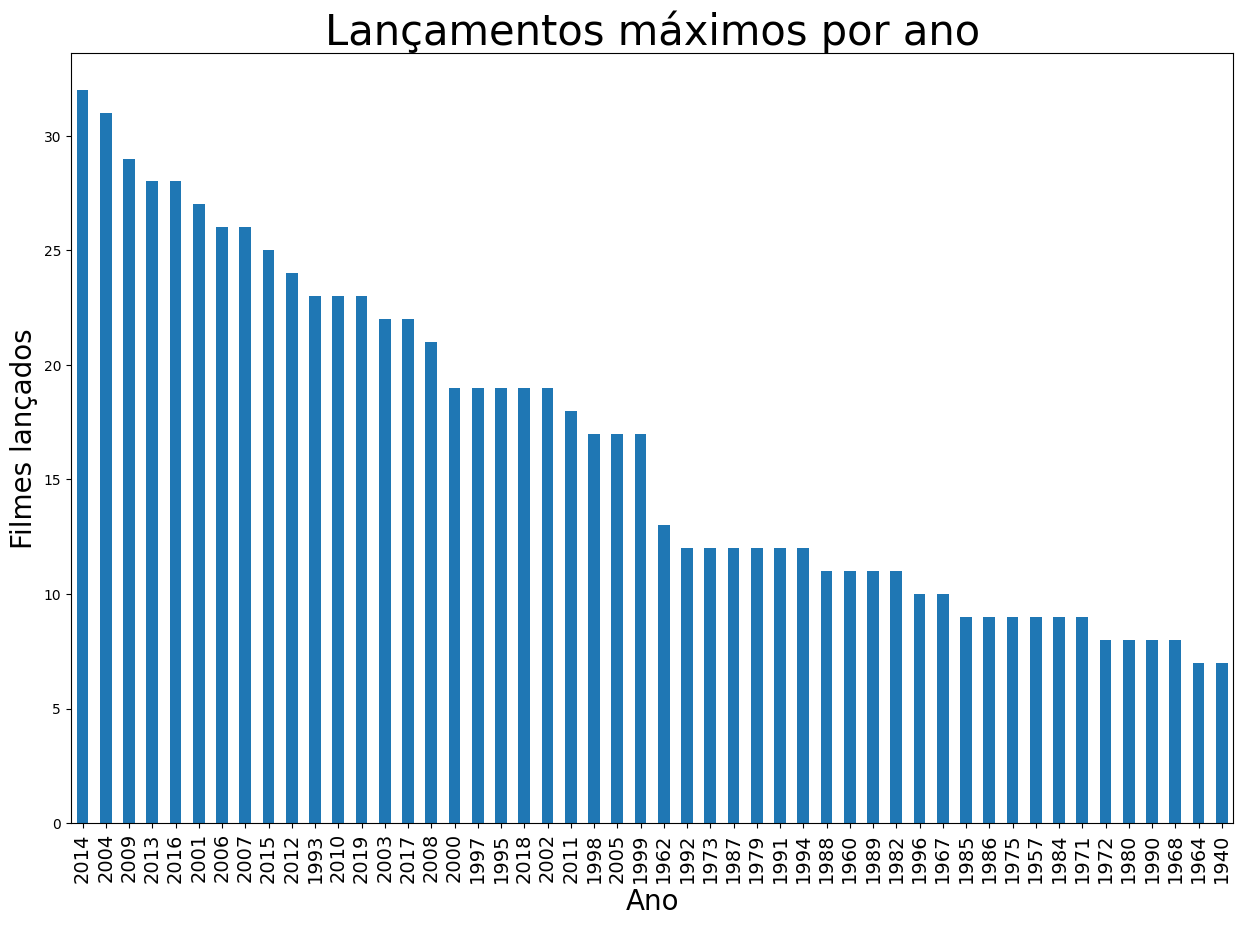

In [253]:
#Vamos ver quantos filmes foram lançados por ano, e extrair os maiores 50 valores
plt.figure(figsize = (15,10))
df_principal["Released_Year"].value_counts(sort = True)[:50].plot(kind = "bar")
plt.xlabel("Ano" , fontsize = 20)
plt.ylabel("Filmes lançados" , fontsize = 20)
plt.title("Lançamentos máximos por ano" , fontsize = 30)
plt.xticks(fontsize = 14)
plt.show()

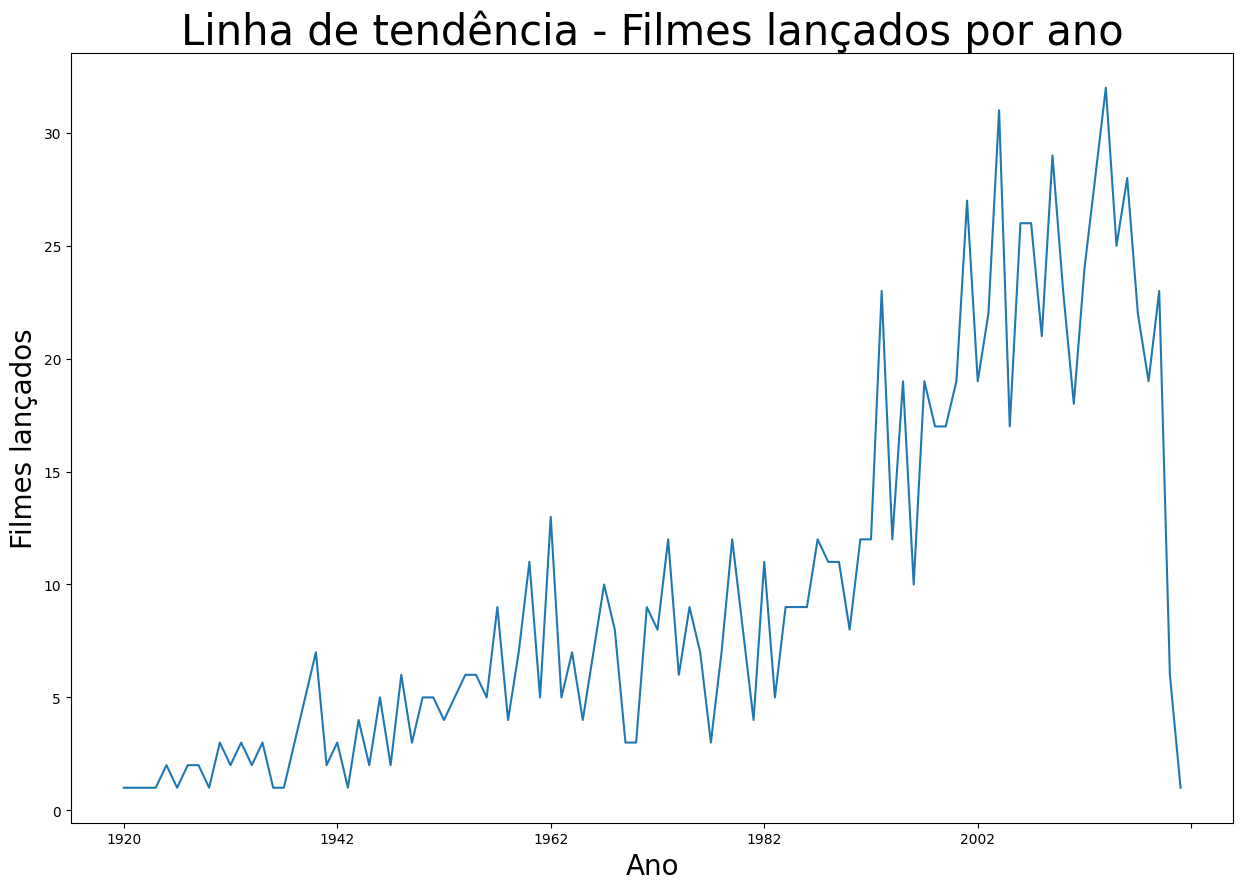

In [254]:
# Vamos ver a linha de tendência para os filmes lançados ao longo do tempo
plt.figure(figsize = (15,10))
df_principal["Released_Year"].value_counts().sort_index().plot(kind = "line")
plt.xlabel("Ano" , fontsize = 20)
plt.ylabel("Filmes lançados" , fontsize = 20)
plt.title("Linha de tendência - Filmes lançados por ano" , fontsize = 30)
plt.show()

Não temos uma evolução bem definida, mas podemos ver que houve um aumento de lançamentos ao longo dos anos.

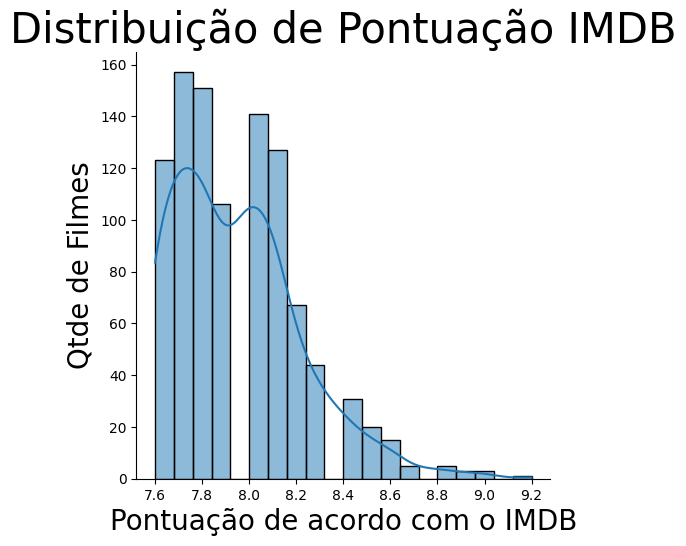

In [255]:
# Verificando a disposição da coluna "IMDB_Rating" (Pontuação de acordo com o IMDB) do dataset
sns.displot(df_principal["IMDB_Rating"], kde=True)
plt.xlabel("Pontuação de acordo com o IMDB" , fontsize = 20)
plt.ylabel("Qtde de Filmes" , fontsize = 20)
plt.title("Distribuição de Pontuação IMDB" , fontsize = 30)
plt.show()

In [256]:
pd.cut(df_principal["IMDB_Rating"], [0,2,4,6,8,10]).value_counts(normalize="True")*100

IMDB_Rating
(6, 8]     67.867868
(8, 10]    32.132132
(0, 2]      0.000000
(2, 4]      0.000000
(4, 6]      0.000000
Name: proportion, dtype: float64

Podemos ver que a maior parte dos filmes estão abaixo da pontuação 8.0, como já havíamos estimado anteriormente.

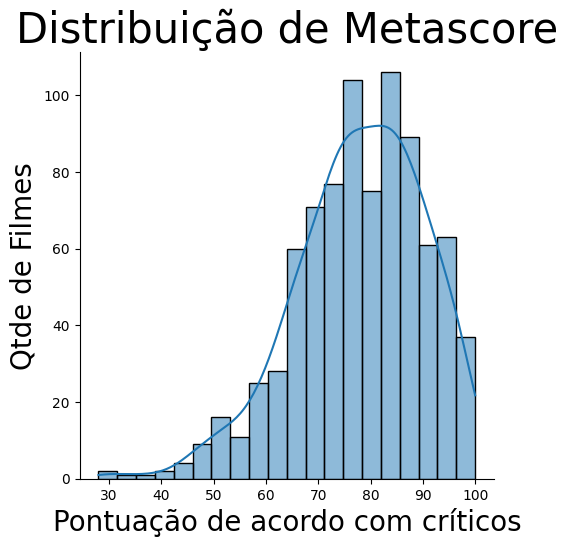

In [257]:
# Verificando a disposição da coluna "Meta_score" (Pontuação entre críticos) do dataset
sns.displot(df_principal["Meta_score"], kde=True)
plt.xlabel("Pontuação de acordo com críticos" , fontsize = 20)
plt.ylabel("Qtde de Filmes" , fontsize = 20)
plt.title("Distribuição de Metascore" , fontsize = 30)
plt.show()

In [258]:
pd.cut(df_principal["Meta_score"], [0,20,40,60,80,100]).value_counts(normalize="True")*100

Meta_score
(60, 80]     46.199525
(80, 100]    45.368171
(40, 60]      7.838480
(20, 40]      0.593824
(0, 20]       0.000000
Name: proportion, dtype: float64

Apesar dos gráficos das notas entre IBDM e crítica aparentarem serem muito diferentes, com um olhar mais atento podemos ver que se desconsiderarmos as notas abaixo de 70, as formas dos gráficos tem muita semelhança: O pico atinge seu máximo aproximadamente em 8, e a partir daí temos uma queda.
Mas podemos notar outra coisa também: Foi observado anteriormente que algum filme recebeu pontuações discrepantes entre IMDB e crítica. Através desse gráfico, podemos ver que existem muito filmes que apresentam essa característica.

In [259]:
# Verificando quantos valores de "Certificate" (Classificação) existem no dataset
df_principal["Certificate"].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

Podemos ver que os filmes foram classificados de acordo com muitos sistemas de classificação diferentes. Precisamos unificar esses dados.
De acordo com pesquisas, foi percebido que o sistema mais "democrático" seria o sistema que divide os filmes em UA, U, A, e S. PG e G possuem diferentes significados em diferentes países.
Iremos, também, remover a classificação "Unrated", já que os filmes com essa marcação não possuem classificação. Os filmes marcados com "Approved" e "Passed" diz respeito à uma classificação anterior às classficações por faixa etária (Para o filme ser produzido, ele tinha que ser classificado como "Approved" ou "Passed". Nada era dito a respeito do público-alvo).

In [260]:
# Função para limpar os dados de classificação
def clean_certificate(certificate):
    if certificate == None:
        return None
    # Classificação aberta para todos os públicos
    if (certificate == "G") or (certificate == "U/A"):
        return "UA"
    # Classificação com supervisão parental
    elif (certificate == "PG-13") or (certificate == "PG") or (certificate == "TV-14") or (certificate == "GP") or (certificate == "TV-PG"):
        return "U"
    # Classificação +18
    elif (certificate == "R") or (certificate == "TV-MA"):
        return "A"
    else:
        return None

df_principal["Certificate"] = df_principal["Certificate"].apply(lambda x : clean_certificate(x))

Com a coluna de classificação, agora devidamente ajustada, podemos analisar a distribuição das classificações:

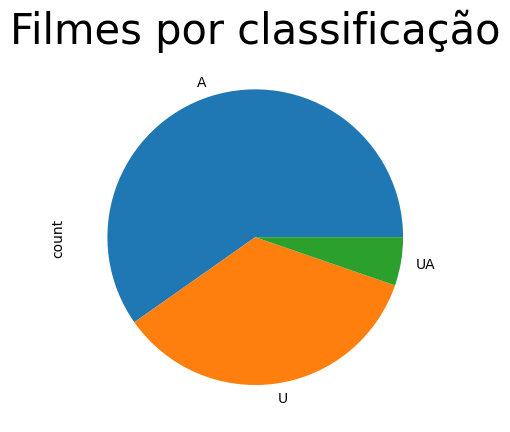

In [261]:
# Vamos ver a distribuição da classificação
df_principal["Certificate"].value_counts().plot(kind = "pie")
plt.title("Filmes por classificação" , fontsize = 30)
plt.show()

Podemos ver que a maior parte dos filmes entram na classificação "A" (filmes +18). Em segundo lugar, vem os filmes classificados como "U" (abertos para adolescentes mas com supervisão parental). E em último, os classificados com "UA" (aberto para todos os públicos).

In [262]:
df_principal["Runtime"].unique()

array(['175 min', '152 min', '202 min', '96 min', '201 min', '154 min',
       '195 min', '148 min', '139 min', '178 min', '142 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '160 min',
       '132 min', '153 min', '169 min', '130 min', '125 min', '189 min',
       '116 min', '127 min', '118 min', '121 min', '207 min', '122 min',
       '106 min', '112 min', '151 min', '150 min', '155 min', '119 min',
       '110 min', '88 min', '137 min', '89 min', '165 min', '109 min',
       '102 min', '87 min', '126 min', '147 min', '117 min', '181 min',
       '149 min', '105 min', '164 min', '170 min', '98 min', '101 min',
       '113 min', '134 min', '229 min', '115 min', '143 min', '95 min',
       '104 min', '123 min', '131 min', '108 min', '81 min', '99 min',
       '114 min', '129 min', '228 min', '128 min', '103 min', '107 min',
       '68 min', '138 min', '156 min', '167 min', '163 min', '186 min',
       '321 min', '135 min', '140 min', '180 min', '158 min'

Aqui, podemos ver que a coluna "Runtime" (tempo de duração) não está definida com um valor numérico. Iremos criar uma função para limpar esse dado.

In [263]:
# Função para limpar os dados de tempo de duração
def clean_runtime(runtime):
    value = runtime.split(" ")
    return int(value[0])

df_principal["Runtime"] = df_principal["Runtime"].apply(lambda x : clean_runtime(x))

Com a coluna de tempo devidamente ajustada, podemos analisar suas tendências.

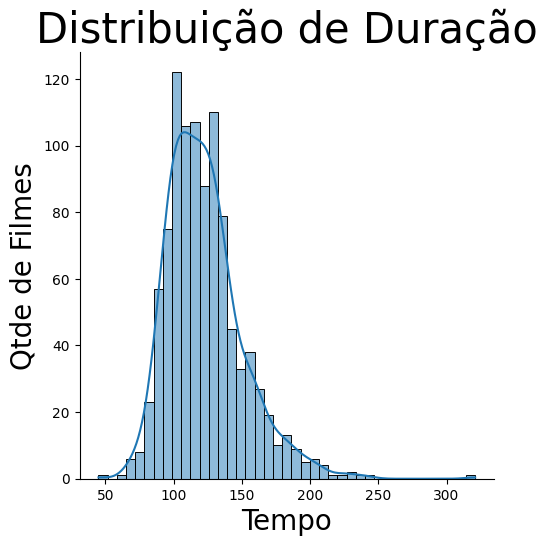

In [264]:
# Verificando a disposição da coluna "Runtime" do dataset
sns.displot(df_principal["Runtime"], kde=True)
plt.xlabel("Tempo" , fontsize = 20)
plt.ylabel("Qtde de Filmes" , fontsize = 20)
plt.title("Distribuição de Duração" , fontsize = 30)
plt.show()

Podemos ver que a maior parte dos filmes tendem a ficar na faixa de 100 a 150 minutos de duração.

Trabalhando com a coluna "Gross", foi possível notar que está mesclada com dados do tipo float e string. Criaremos uma função para limpar esses dados.

In [265]:
# Função para limpar os dados de Arrecadação
def clean_gross(gross):
    var_float = 1.2
    var_str = "teste"
    if type(gross) == type(var_str):
        resultado = gross.split(",")
        resultado_final = resultado[0]+resultado[1]
        if len(resultado) == 3:
            resultado_final = resultado_final+resultado[2]
        return float(resultado_final)
    elif type(gross) == type(var_float):
        gross = gross*1000
        return gross
    return

df_principal["Gross"] = df_principal["Gross"].apply(lambda x : clean_gross(x))

Com a coluna de Arrecadação devidamente ajustada, iremos analisá-la.

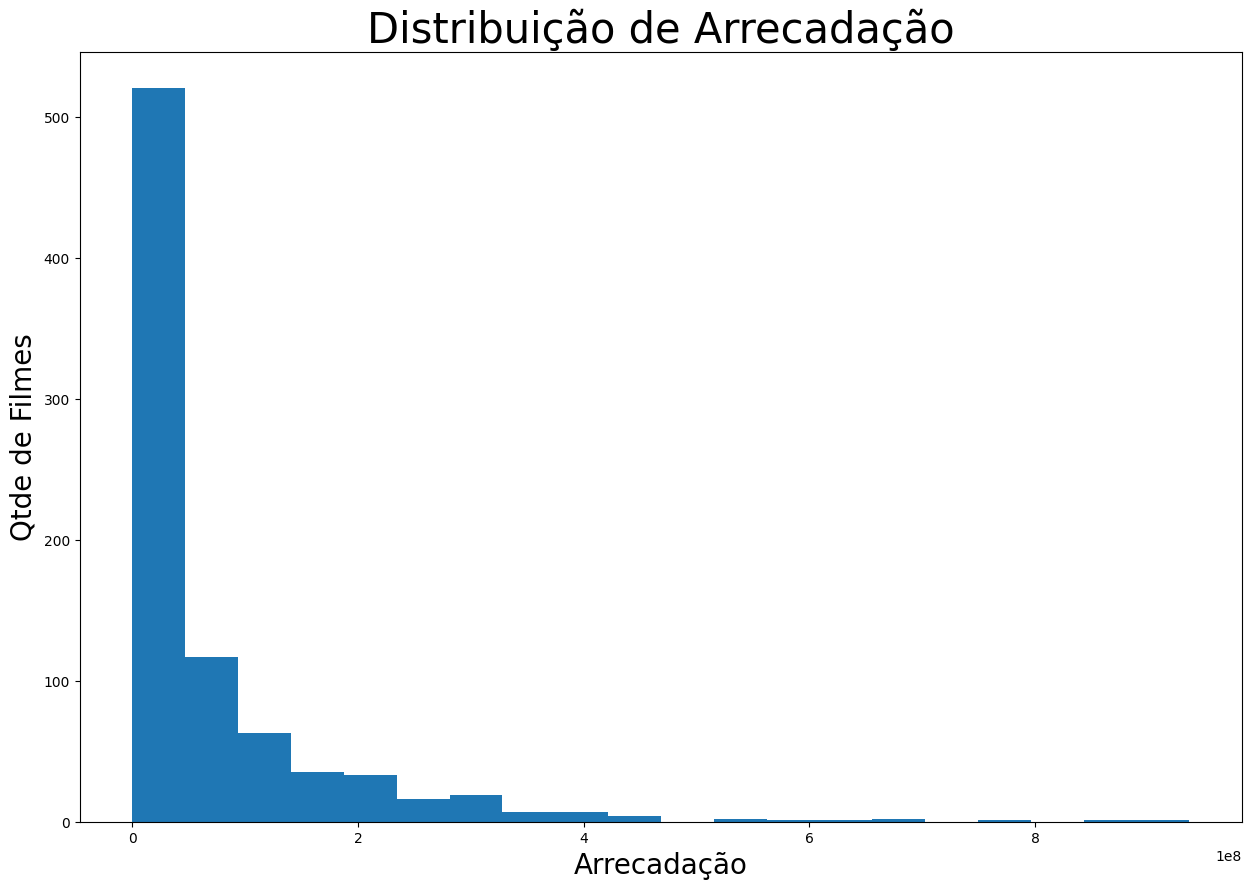

In [266]:
# Verificando a disposição da coluna "Gross" do dataset
plt.figure(figsize = (15,10))
df_principal["Gross"].plot.hist(bins=20)
plt.xlabel("Arrecadação" , fontsize = 20)
plt.ylabel("Qtde de Filmes" , fontsize = 20)
plt.title("Distribuição de Arrecadação" , fontsize = 30)
plt.show()

Podemos perceber que a maior parte dos filmes arrecadou menos que 200 milhões. Porém, como a maior parte dos filmes se concentram nas primeiras faixas, seria interessante analisar a faixa até os 100 milhões com mais detalhes.

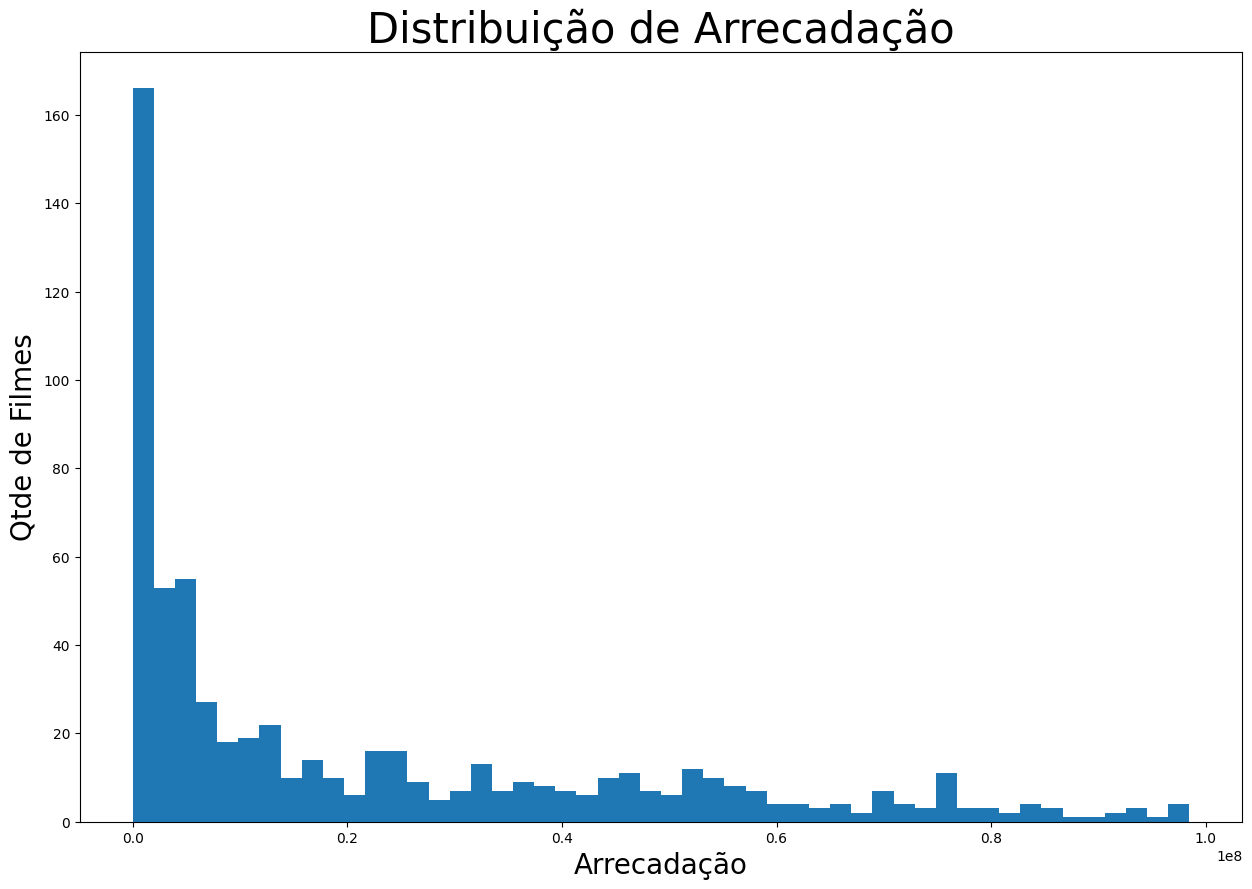

In [267]:
# Verificando a disposição da coluna "Gross" do dataset
df_gross = df_principal[df_principal["Gross"]<=100000000]

plt.figure(figsize = (15,10))
df_gross["Gross"].plot.hist(bins=50)
plt.xlabel("Arrecadação" , fontsize = 20)
plt.ylabel("Qtde de Filmes" , fontsize = 20)
plt.title("Distribuição de Arrecadação" , fontsize = 30)
plt.show()

Vemos que a arrecadação de filmes aparenta ter a tendência de queda exponencial.

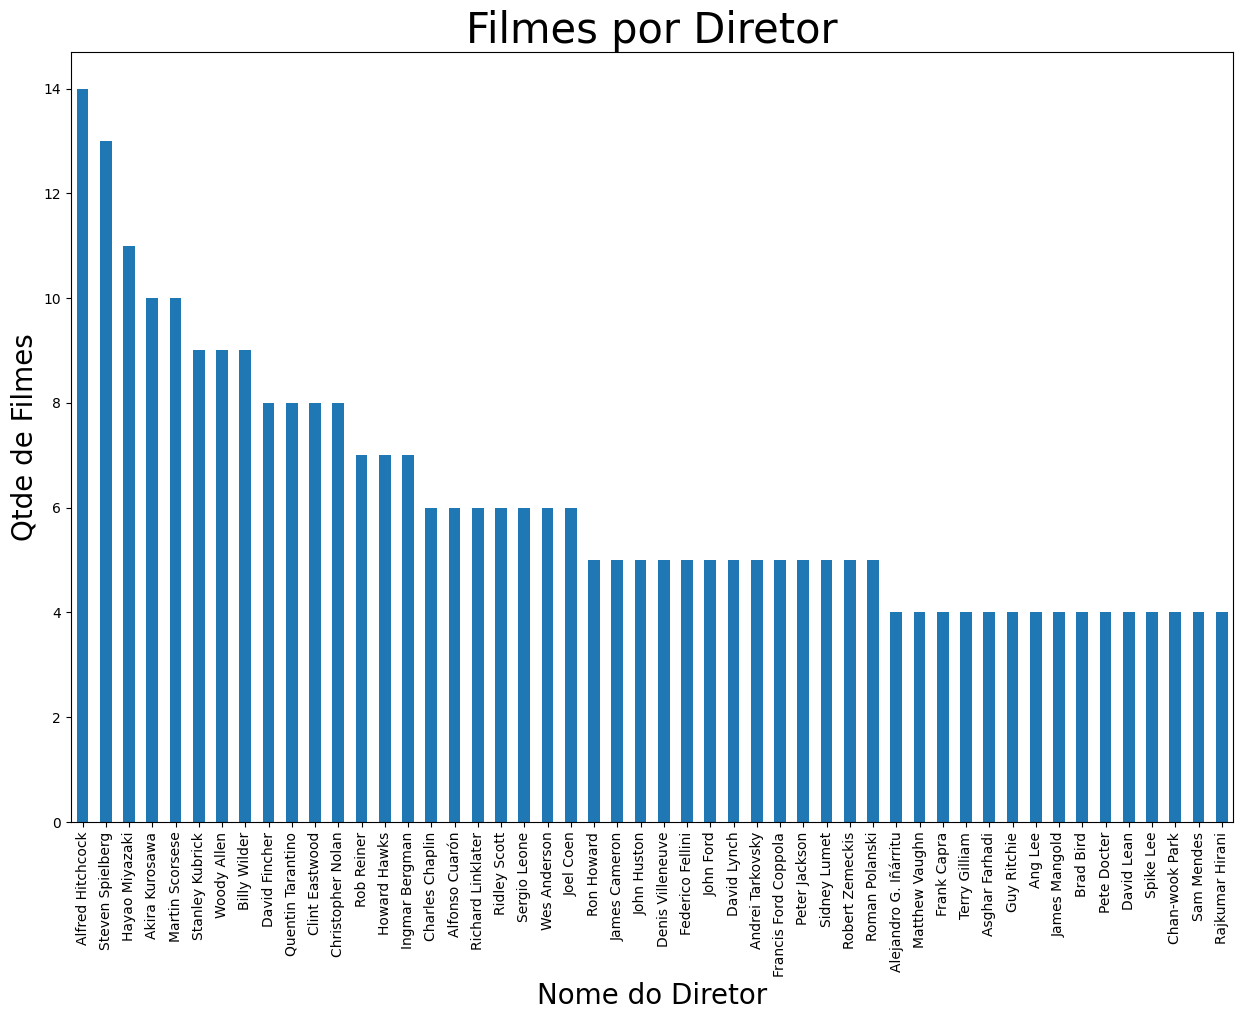

In [268]:
#Verificamos a quantidade de filmes por diretor, para os 50 primeiros diretores
plt.figure(figsize = (15,10))
df_principal["Director"].value_counts(sort = True)[:50].plot(kind = "bar")
plt.xlabel("Nome do Diretor" , fontsize = 20)
plt.ylabel("Qtde de Filmes" , fontsize = 20)
plt.title("Filmes por Diretor" , fontsize = 30)
plt.show()

Vemos que Alfred Hitchcock está na liderança com mais filmes dirigidos. Steven Spielberg perde com somente 1 filme a menos.

Nas primeiras análises do dataset, é possível ver que cada filme possui vários gêneros em uma mesma coluna, o que dificulta a análise. Iremos lapidar o dataset para podermos analisar os dados pelo viés de cada gênero individual.

In [269]:
# Função para dar split na coluna de gêneros
def cut_genre(genre):
    return genre.split(", ")

df_principal["Genre"] = df_principal["Genre"].apply(lambda x : cut_genre(x))

Na coluna "Genre" agora armazenamos uma lista com os gêneros separados, ao invés de uma string como na coluna original.

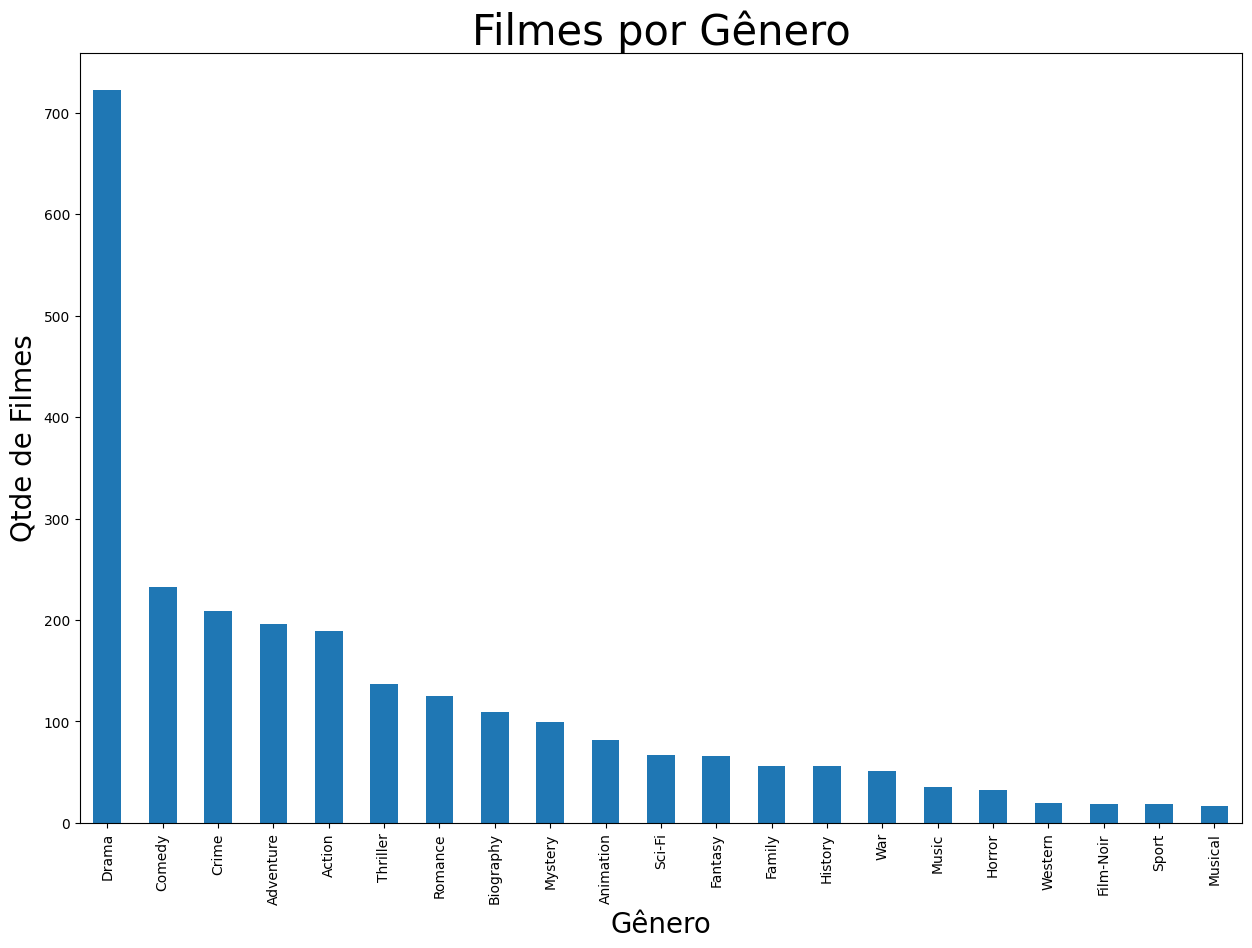

In [270]:
#Verificamos a quantidade de filmes por gênero
plt.figure(figsize = (15,10))
pd.Series(sum([item for item in df_principal["Genre"]], [])).value_counts().plot(kind = "bar")
plt.xlabel("Gênero" , fontsize = 20)
plt.ylabel("Qtde de Filmes" , fontsize = 20)
plt.title("Filmes por Gênero" , fontsize = 30)
plt.show()

Vemos que o gênero Drama é o mais predominante, e com uma margem bem grande.

Cada filme possui mais de uma estrela nesse dataset. Mas um ator ou atriz pode fazer um papel principal em um filme, e secundário em outro. Queremos juntar essas 4 colunas para melhoras nossas análises.

In [271]:
# Criando uma coluna que irá armazenar uma lista com os nomes de todas as estrelas
df_principal["StarS"] = df_principal.apply(lambda row: [row["Star1"], row["Star2"], row["Star3"], row["Star4"]], axis=1)

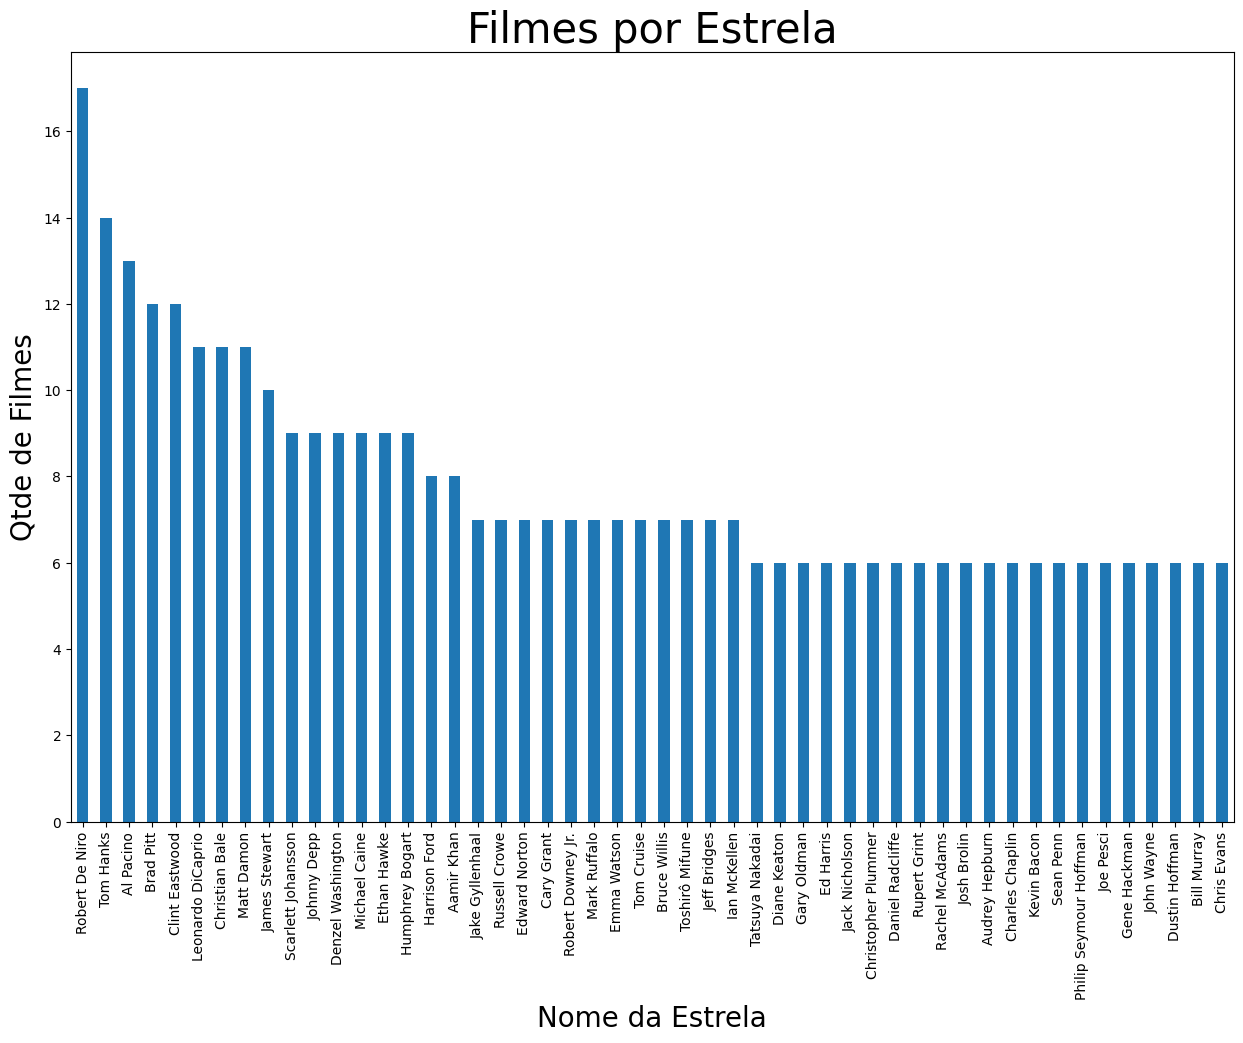

In [272]:
#Verificamos a quantidade de filmes por estrela, para as 50 primeiras estrelas
plt.figure(figsize = (15,10))
pd.Series(sum([item for item in df_principal["StarS"]], [])).value_counts()[:50].plot(kind = "bar")
plt.xlabel("Nome da Estrela" , fontsize = 20)
plt.ylabel("Qtde de Filmes" , fontsize = 20)
plt.title("Filmes por Estrela" , fontsize = 30)
plt.show()

Vemos que o ator que mais apareceu em filmes foi o Robert de Niro, aparecendo em mais de 16 filmes.

In [273]:
# Função para dar split na coluna de Overview
def cut_overview(overview):
    palavras = overview.split()
    for palavra in palavras:
        if "," in palavra or "." in palavra or ":" in palavra or ";" in palavra:
            palavra = palavra[:-1]
    return palavras

df_principal["Overview"] = df_principal["Overview"].apply(lambda x : cut_overview(x))

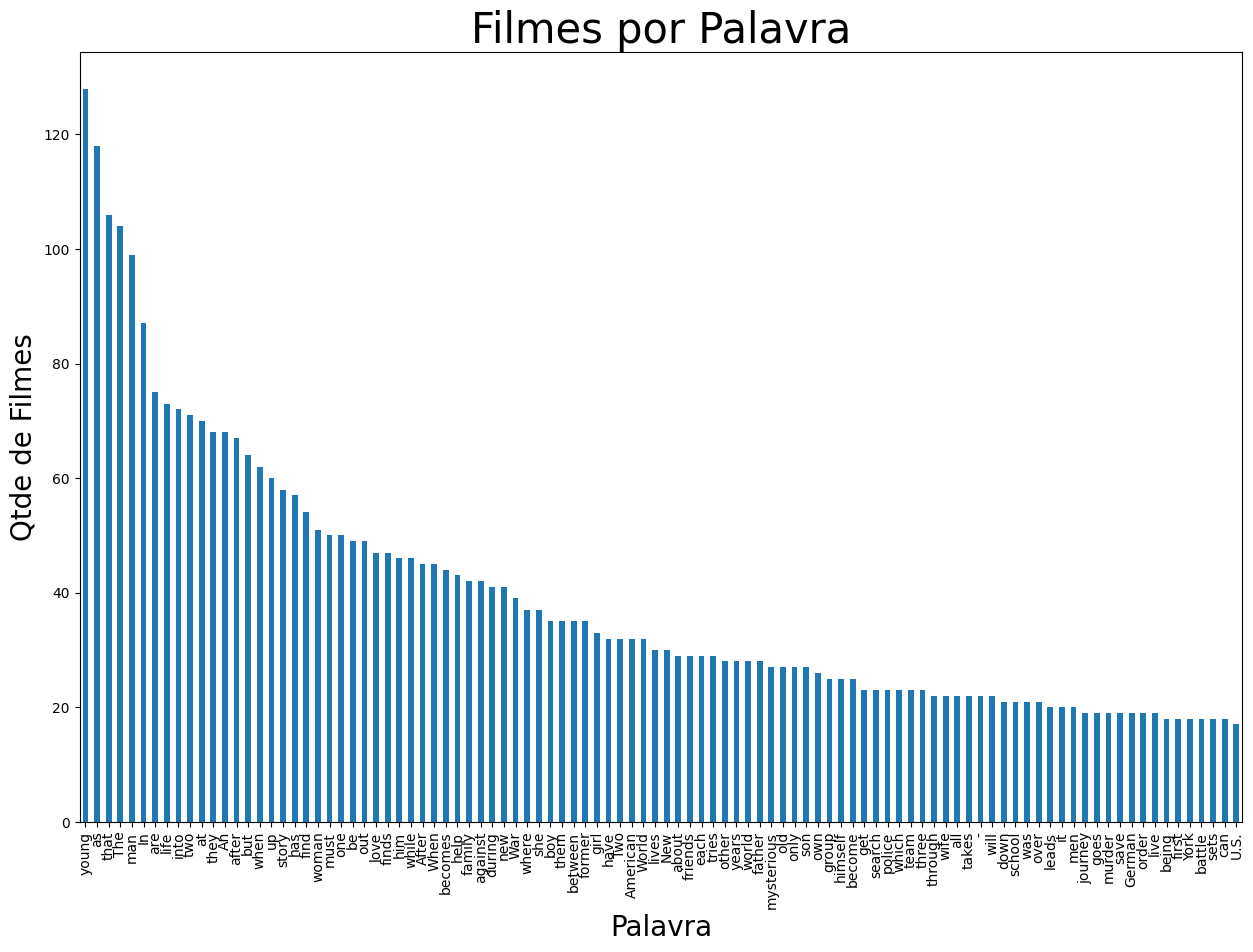

In [274]:
#Verificamos a quantidade de filmes por palavra, da palavra 19 à palavra 119 - verificamos que as 18 primeiras palavras eram pronomes e artigos
plt.figure(figsize = (15,10))
pd.Series(sum([item for item in df_principal["Overview"]], [])).value_counts()[19:119].plot(kind = "bar")
plt.xlabel("Palavra" , fontsize = 20)
plt.ylabel("Qtde de Filmes" , fontsize = 20)
plt.title("Filmes por Palavra" , fontsize = 30)
plt.show()

O substantivo mais escrito nas sinopses dos filmes é "young" ("jovem" em inglês). Com uma análise mais detalhada seria possível extrair mais informações dessa coluna, porém demandaria mais tempo.

### Análise de correlação

Aqui iremos investigar se existe correlação entre as variáveis numéricas do nosso dataset. Se houver correlação, é um forte indício de que uma variável influencia no valor da a outra, e vice-versa.

In [275]:
# Convertendo o valor do ano de lançamento para poder usar na função de correlação
def convert_to_int(value):
    if value == 'PG':
        return None
    return int(value)

df_principal["Released_Year"] = df_principal["Released_Year"].apply(lambda x : convert_to_int(x))

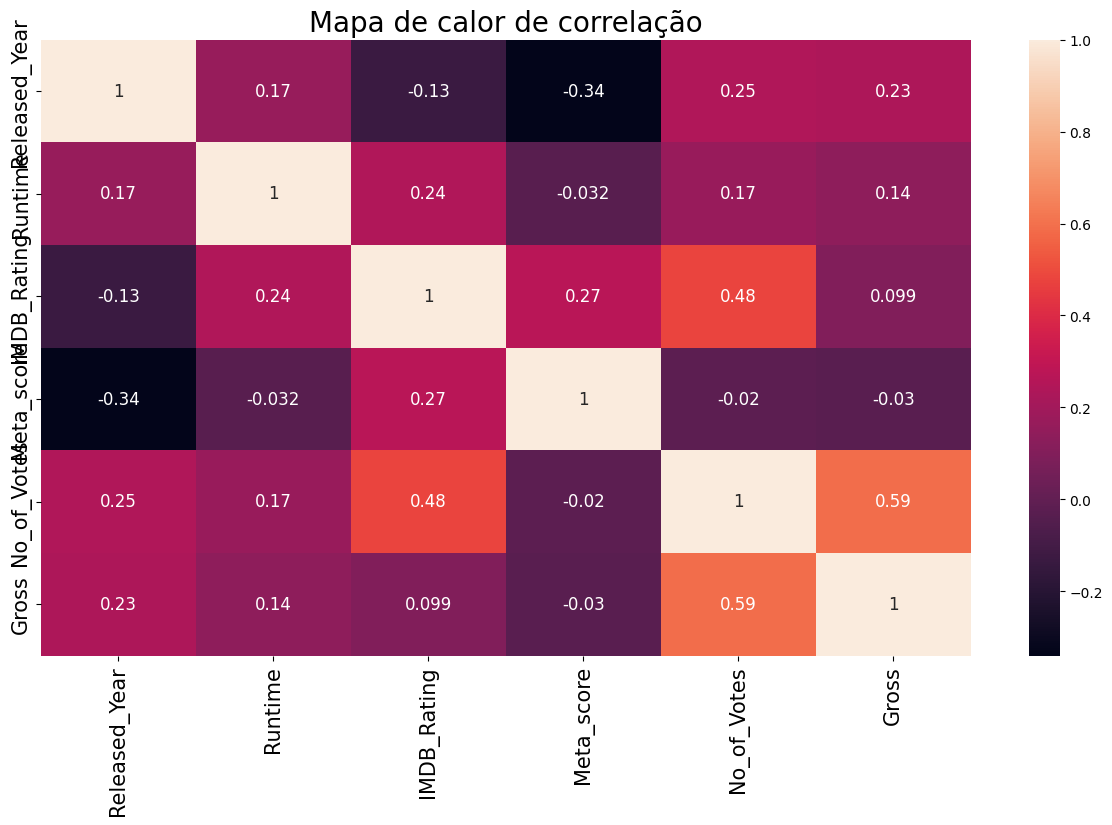

In [276]:
# Criando função para identificar a correlação entre as variáveis do dataset de treino
corr = df_principal[["Released_Year", "Runtime", "IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr , annot=True , annot_kws= {'size':12})
plt.title("Mapa de calor de correlação" , fontsize = 20)
plt.xticks(fontsize = 15,rotation = 90)
plt.yticks(fontsize = 15)
plt.show()

In [277]:
# Visualizando a correlação do dataset de treino em tabela
# Coeficiente de correlação:
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df_principal[["Released_Year", "Runtime", "IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]].corr()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,0.165765,-0.133257,-0.339291,0.246005,0.233270
Runtime,0.165765,1.000000,0.242751,-0.031604,0.172483,0.140002
IMDB_Rating,-0.133257,0.242751,1.000000,0.271374,0.479308,0.099393
Meta_score,-0.339291,-0.031604,0.271374,1.000000,-0.020091,-0.030480
No_of_Votes,0.246005,0.172483,0.479308,-0.020091,1.000000,0.589527
Gross,0.233270,0.140002,0.099393,-0.030480,0.589527,1.000000


Pelo gráfico e pela tabela, não há indícios de uma correlação nem muito forte positivamente e nem muito forte negativamente.

## Preparando os dados

Para podermos treinar um modelo de ML, precisamos preparar os dados além do que já preparamos anteriormente.

### Valores Missing

Nas nossas análises anteriores, já vimos que existem valores nulos no nosso dataset com o seguinte comando:

In [278]:
df_principal.isnull().sum()

Series_Title       0
Released_Year      1
Certificate      753
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
StarS              0
dtype: int64

Mas podemos verificar de uma forma bem mais direta:

In [279]:
# Verificando se existem valores nulos no dataset
df_principal.isnull().values.any()

True

Agora, iremos averiguar se existe algum valor missing oculto.

In [280]:
# As colunas "Released_Year", "Runtime", "No_of_Votes" e "Gross" são colunas que não poderiam ter um valor zerado
# Verificando quantos valores missing ocultos existem no dataset de treino
print(len(df_principal.loc[df_principal["Released_Year"] == 0]))
print(len(df_principal.loc[df_principal["Runtime"] == 0]))
print(len(df_principal.loc[df_principal["No_of_Votes"] == 0]))
print(len(df_principal.loc[df_principal["Gross"] == 0]))

0
0
0
0


Existe, portanto, somente dados nulos. Precisamos decidir como iremos tratá-los.

### Tratando Dados Missing - Impute

Vimos que a coluna "Certificate" tem 753 valores missing, e a nossa tabela tem 999 linhas. Não iremos conseguir uma boa precisão ao treinar um modelo com uma coluna com 75% de valores faltantes. O melhor nesse caso seria desconsiderar essa linha.

In [281]:
# Tirando a linha "Certificate"
df_principal = df_principal.drop(columns=["Certificate"])

Temos 1 valor missing na coluna de "Released_Year". Nesse caso iremos descartar essa linha.

In [282]:
#Descobrindo qual linha possui valor missing na coluna "Released_Year"
value_index = df_principal[df_principal["Released_Year"].isnull()].index.tolist()[0]

df_principal = df_principal.drop([value_index])

Os valores missing das colunas "Meta_score" e "Gross" serão substituídos pelos valores de média.

In [283]:
# Substituindo valores nulos pela média
df_principal["Meta_score"] = df_principal["Meta_score"].fillna(df_principal["Meta_score"].mean())
df_principal["Gross"] = df_principal["Gross"].fillna(df_principal["Gross"].mean())

Agora iremos confirmar se não existem mais valores missing.

In [284]:
# Verificando se ainda existem valores nulos no dataset de treino
df_principal.isnull().values.any()

False

Não existem mais valores missing no nosso dataset, exatamente como esperávamos.

### Refinando colunas

Agora, temos que selecionar quais colunas são as mais importantes para treinar o nosso modelo.

In [285]:
# Analisando nosso dataset atualmente
df_principal.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,StarS
0,The Godfather,1972.0,175,"[Crime, Drama]",9.2,"[An, organized, crime, dynasty's, aging, patri...",100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
1,The Dark Knight,2008.0,152,"[Action, Crime, Drama]",9.0,"[When, the, menace, known, as, the, Joker, wre...",84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
2,The Godfather: Part II,1974.0,202,"[Crime, Drama]",9.0,"[The, early, life, and, career, of, Vito, Corl...",90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,"[Al Pacino, Robert De Niro, Robert Duvall, Dia..."
3,12 Angry Men,1957.0,96,"[Crime, Drama]",9.0,"[A, jury, holdout, attempts, to, prevent, a, m...",96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John..."
4,The Lord of the Rings: The Return of the King,2003.0,201,"[Action, Adventure, Drama]",8.9,"[Gandalf, and, Aragorn, lead, the, World, of, ...",94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O..."


Quando analisamos o atributo de gênero, vimos que ele pode assumir 21 opções. Iremos, então, criar uma coluna para cada valor, e em cada linha ele irá assumir um valor de 0 ou 1.

In [286]:
# Função para verificar se o gênero está na lista
def verify_genre(str_genre, lista):
    for genre in lista:
        if genre == str_genre:
            return 1
    return 0

# Adição de colunas de gênero ao dataset
df_principal["Drama"] = df_principal["Genre"].apply(lambda x : verify_genre("Drama", x))
df_principal["Comedy"] = df_principal["Genre"].apply(lambda x : verify_genre("Comedy", x))
df_principal["Crime"] = df_principal["Genre"].apply(lambda x : verify_genre("Crime", x))
df_principal["Adventure"] = df_principal["Genre"].apply(lambda x : verify_genre("Adventure", x))
df_principal["Action"] = df_principal["Genre"].apply(lambda x : verify_genre("Action", x))
df_principal["Thriller"] = df_principal["Genre"].apply(lambda x : verify_genre("Thriller", x))
df_principal["Romance"] = df_principal["Genre"].apply(lambda x : verify_genre("Romance", x))
df_principal["Biography"] = df_principal["Genre"].apply(lambda x : verify_genre("Biography", x))
df_principal["Mystery"] = df_principal["Genre"].apply(lambda x : verify_genre("Mystery", x))
df_principal["Animation"] = df_principal["Genre"].apply(lambda x : verify_genre("Animation", x))
df_principal["Sci-Fi"] = df_principal["Genre"].apply(lambda x : verify_genre("Sci-Fi", x))
df_principal["Fantasy"] = df_principal["Genre"].apply(lambda x : verify_genre("Fantasy", x))
df_principal["Family"] = df_principal["Genre"].apply(lambda x : verify_genre("Family", x))
df_principal["History"] = df_principal["Genre"].apply(lambda x : verify_genre("History", x))
df_principal["War"] = df_principal["Genre"].apply(lambda x : verify_genre("War", x))
df_principal["Music"] = df_principal["Genre"].apply(lambda x : verify_genre("Music", x))
df_principal["Horror"] = df_principal["Genre"].apply(lambda x : verify_genre("Horror", x))
df_principal["Western"] = df_principal["Genre"].apply(lambda x : verify_genre("Western", x))
df_principal["Film-Noir"] = df_principal["Genre"].apply(lambda x : verify_genre("Film-Noir", x))
df_principal["Sport"] = df_principal["Genre"].apply(lambda x : verify_genre("Sport", x))
df_principal["Musical"] = df_principal["Genre"].apply(lambda x : verify_genre("Musical", x))

Agora com as colunas de gênero criadas, iremos descartar a coluna de gênero original

In [287]:
df_principal = df_principal.drop(columns=["Genre"])

O nosso dataset possui algumas colunas com strings e listas. Não há forma simples de utilizá-los com um modelo para nosso caso, pois podem assumir muitos valores. Iremos, então, descartar tais colunas. Porém, iremos guardar o dataframe em uma variável que iremos usar mais adiante.

In [288]:
df_backup = df_principal

df_principal = df_principal.drop(columns=["Series_Title", "Overview", "Director", "Star1", "Star2", "Star3", "Star4", "StarS"])

E por último, iremos converter a coluna de "IMDB_Rating" para float

In [289]:
# Conversão da pontuação do IMDB para float
df_principal["IMDB_Rating"] = df_principal["IMDB_Rating"].astype(float)

### Finalizando preparações dos dados

Agora, iremos dividir o dataset em dataset de treino e de teste. Definiremos uma proporção de 80% para dados de treino.

In [291]:
df_treino, df_teste = train_test_split(df_principal, train_size=0.8)

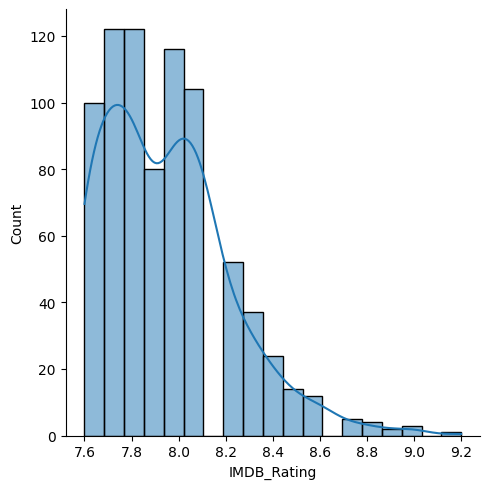

In [292]:
# Verificando como os dados do dataset de treino estão distribuídos da coluna target
sns.displot(df_treino["IMDB_Rating"], kde=True)
plt.show()

Podemos ver que a divisão do dataset foi bem feita, pois a distribuição em torno da variável-alvo foi semelhante à distribuição no dataset por inteiro.

In [293]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ["Released_Year","Runtime","Meta_score","No_of_Votes","Gross", "Drama", "Comedy", "Crime", "Adventure", "Action", "Thriller", "Romance", "Biography", "Mystery", "Animation", "Sci-Fi", "Fantasy", "Family", "History", "War", "Music", "Horror", "Western", "Film-Noir", "Sport", "Musical"]

In [294]:
# Variável a ser prevista
atrib_prev = ["IMDB_Rating"]

Temos a variável que guarda os atributos de entrada, e a variável que guarda o atributo ao qual faremos previsões.

In [295]:
# Criando objetos
X_treino = df_treino[atributos].values
Y_treino = df_treino[atrib_prev].values
X_teste = df_teste[atributos].values
Y_teste = df_teste[atrib_prev].values

Agora com os objetos prontos para o treinamento, estamos prontos para partir para o próximo passo.

Mas antes, iremos responder à pergunta "Qual filme você recomendaria para uma pessoa que você não conhece?". Refletindo nos aprendizados adquiridos sobre os dados até o presente momento, o filme que eu recomendaria para uma pessoa que eu não conheço seria os filmes que possuem atributos o mais próximo das médias: Nem todo mundo gosta de filme longo, mas também tem gente que não gosta de filmes muito curtos. E pudemos ver que os filmes do gênero "Drama" são os mais dominantes. E os filmes mais próximos da média possuem maior chance de ter mais pontuações confiáveis e numerosas, o que diminui dados enviesados. E para o Meta-score, nem sempre uma pessoa comum entende os apontamentos de um crítico de cinema: Muitas vezes um filmes considerados muito bons pela crítica pode não ser bom para uma pessoa com um olhar menos treinado; E o oposto também ocorre.

In [306]:
# Aplicando os filtros comentados acima no dataset para descobrir o(s) título(s) que se encaixa(m) nos filtros
df_backup[(df_backup["Runtime"]<124) & (df_backup["Runtime"] > 121) & (df_backup["Drama"]==1) & (df_backup["IMDB_Rating"]>7.8) & (df_backup["IMDB_Rating"]<8.1) & (df_backup["Meta_score"]>76) & (df_backup["Meta_score"]<79)]

,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,...,Fantasy,Family,History,War,Music,Horror,Western,Film-Noir,Sport,Musical
537,Amarcord,1973.0,123,7.9,"[A, series, of, comedic, and, nostalgic, vigne...",77.970273,Federico Fellini,Magali Noël,Bruno Zanin,Pupella Maggio,...,0,1,0,0,0,0,0,0,0,0


Portanto, o filme que eu recomendaria seria Amarcord.

## RandomForest

O modelo de regressão escolhido foi o RandomForest. O nosso dataset não é tão robusto, portanto não será exigido muito processamento computacional (Já que o modelo é um dos mais pesados). Além disso, a relação entre os argumentos e a variável-alvo é complexa, então um modelo linear talvez não fosse a escolha mais promissora.

### Construindo e treinando o modelo

In [296]:
# Utilizando um regressor RandomForest
from sklearn.ensemble import RandomForestRegressor

In [297]:
# Criando o modelo preditivo
modelo_v1 = RandomForestRegressor(oob_score=True)

In [298]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

RandomForestRegressor(oob_score=True)

Agora o nosso modelo está devidamente treinado. Partiremos, então, para a avaliação de sua exatidão.

### Verificando a exatidão no modelo nos dados de treino

Usaremos 3 métricas para podermos ter mais noção da exatidão do nosso modelo: OOB Score, MSE (Mean Squared Error) e R2-Score.

In [299]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculando o OOB Score
oob_score = modelo_v1.oob_score_

# Fazendo predições com os dados de teste
predicoes = modelo_v1.predict(X_teste)

# Calculando o Mean Squared Error
mse = mean_squared_error(Y_teste, predicoes)

# Calculando o R2-Score
r2 = r2_score(Y_teste, predicoes)

# Exibindo as métricas
print(f'Out-of-Bag Score: {oob_score}\nMean Squared Error: {mse}\nR2-score: {r2}')

Out-of-Bag Score: 0.5076140443713711
Mean Squared Error: 0.03663778999999991
R2-score: 0.48013068463994457


Vemos que o modelo tem uma exatidão de cerca de 50%, o que é razoável, considerando o contexto de aplicação (prever pontuações no IMDB).

## Fazendo Previsões Com o Modelo Treinado

Primeiramente, iremos exportar o modelo para uso futuro.

In [300]:
import pickle

In [301]:
# Salvando o modelo
filename = 'modelo_treinado.pkl'
pickle.dump(modelo_v1, open(filename, 'wb'))

O seguinte filme foi proposto para fazermos uma predição:
*{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}*

 Como é uma previsão de somente 1 título, iremos manualmente transpor os dados para o formato adequado para a predição; Porém, caso estivessemos trabalhando com um número maior de linhas, o ideal seria fazer essa transformação através de códigos.


In [302]:
# Criamos a linha com os dados já adaptados para o nosso modelo
linha = [[1994.0, 142, 80.0, 2343110, 28341469, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [303]:
# Carregando o modelo e fazendo previsão para o dado fornecido
loaded_model = pickle.load(open(filename, 'rb'))
lr_predict_test = loaded_model.predict(linha)

In [304]:
# Verificando o valor resultante da previsão
lr_predict_test[0]

8.786999999999992

Portanto, para os dados fornecidos, o filme teria uma pontuação de aproximadamente 8.8, de acordo com o modelo criado.

## Extra

Aqui, será respondido alguns itens do Desafio que podem não ter ficado claro ao longo deste notebook.

###Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Com a análise feita ao longo deste notebook, acredito que a alta expectativa de faturamento de um filme esteja intimamente ligado com a sua previsão de nota no IMBD. E, para isso, foram usadas as colunas "Released_Year", "Runtime", "Genre", "Meta_score" e "No_of_Votes" (Além do "Gross", mas essa é justamente a variável-alvo na hipótese respondida aqui). Porém, também acredito que as variáveis no formato String também tem papel importante, como "Director", todas as colunas de estrelas, além das palavras-chave dentro de "Overview". Porém, devo admitir que tenho ainda muito o que aprender, então não tenho conhecimento suficiente para aprofundar numa análise no momento atual. Mas espero poder num futuro próximo.

### Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

Como dito na resposta anterior, acredito que é possível extrair muitas informações da coluna "Overview", mas não posso dar uma resposta certeira. Mas por observação, acredito que com as palavras-chaves ao longo da sinopse podemos extrair o gênero, e talvez até prever o Faturamente e pontuações futuras.

# Fim!

### Obrigada pela atenção!